## Project 4 : Job Market Analysis
## Notebook 05: Predictive Model Building using NLP

This step is to identify the top skills for each job category. In order to do that, I will use the job description, using natural language processing techniques. Upon which, I will build a classification model and check the importance of top keywords appearing for each job category.

I will use the Tf-Idf Vectorizer to transform my documents to vectors, and then run models on it.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('final_jobs.csv', index_col = [0])

In [3]:
df.head();

In [4]:
x_df =df['job_description']
y_df = df['new_job_title']

In [5]:
x_df.head();

## Dependant Variable:
The baseline prediction for this problem is 48.7% because this is the ratio that is most predominant group in my dataset of 1248 records.

In [6]:
y_df.value_counts(normalize = True)

data analyst        0.474803
business analyst    0.431496
data manager        0.063780
data scientist      0.029921
Name: new_job_title, dtype: float64

## Splitting the DataFrame to train and test data

Splitting the size of the data to 85-15 train and test 

In [7]:
X_train, X_test, y_train, y_test=train_test_split(x_df, y_df, test_size = 0.15, random_state=42)

In [8]:
X_train.head(), "****", X_test.head();

## TF-IDF

- I simply used the Tf-idf vectorizer to transform my train and test data. I did not try lemmetizing and stemming in this.
- I populated the stop-word list using trial and error methods using multiple runs of this program.

In [28]:
## Adding extended_stopwords:
extended_stopwords = ['business', 'process', 'requirements','product', 'state', 'specifications', 'excellent', 'user', 'document', 'domain', 'mapping', 
'relationships', 'sector', 'change', 'analyse', 'intelligence', 'identify', 'stories', '12', 'ability', 'wealth', 'cases','objectives'
'data', 'scientist', 'science', 'asset', 'master', 'entry', 'advertising', 'macquarie','problems', 'clients', 'ibm', 'preferred', 'integrity', 'customers',
'use', 'end', 'children', 'technologies', 'manager', 'centre', 'vendor', 'project', 'account', 'electrical', 'fraud', 'selling', 'salexo', 'data', 'program', 
'marketing', 'record', 'targets','market','investment','9922','centers', 'cancer', 'statistical', 'detection', 'deloitte', 'epidemiological',
'extremely', 'depth', 'mcs', 'patterns', 'familiarity', 'prevention', 'council', 'flat', 'pattern', 'wish', 'freedom', 'grant', 'collaborate', 'thorough',
'got', 'doing', 'cdc', 'selection', 'recognition', 'behaviours', 'understand', 'structures','analyst','managers', 'analytics','managing', 'managers', '000', 'cables', 'drive', 'promote', 'channel', 'scale', 
'standing', 'current', 'optus', 'large','org','papers','improve', 'contribute', 'hortonworks', 'packaging', 'verbally', 'happy','retention','learner','structure', 'discuss','marinov',
'unicorn', 'craftsman','anton','deem','makersin', 'spacious', 'gathering', 'ba', 'stakeholders', 'projects', 'processes', 'new', 'banking','insights','advanced','tools','governance',
'andrew', 'cabling','base', 'products','consistent','managed', 'emerging','medical', 'series', 'sciences','experienceminimum','health','pharmacy','islander', 'trial', 'longitudinal', 'connections', 'exchange', 'stacks', 'applyclick', 'torres',
'strait','operational','facilitate','plans','solution','courage','8888','9481','politics','rare','experienceideally','aborginal', 'trying', 'swineburne','capital','studies']

my_sw = list(ENGLISH_STOP_WORDS) + extended_stopwords

In [29]:
len(my_sw)

485

In [30]:
vectorizer = TfidfVectorizer(stop_words= my_sw)
X1 = vectorizer.fit(X_train, y_train)
y1 = vectorizer.fit(X_test, y_test)

In [31]:
X_train1 = pd.DataFrame(vectorizer.transform(X_train, y_train).todense(),
                       columns=vectorizer.get_feature_names())
X_test1  = pd.DataFrame(vectorizer.transform(X_test, y_test).todense(),
                       columns=vectorizer.get_feature_names())

In [32]:
X_test1.shape, X_train1.shape, y_train.shape, y_test.shape

((191, 5664), (1079, 5664), (1079,), (191,))

## Modelling:
## 1. Logistic Regression

In [57]:
## Logistic regression without cross validation with L2
logres = LogisticRegression(penalty = 'l2', C= 1.0, multi_class='auto', solver='lbfgs').fit(X_train1, y_train)
print('Overall Training Accuracy: {:.1f}%'.format(logres.score(X_train1, y_train)* 100))
print('Overall Testing Accuracy: {:.1f}%'.format(logres.score(X_test1, y_test) * 100))

Overall Training Accuracy: 87.9%
Overall Testing Accuracy: 71.7%


In [55]:
## Logistic regression without cross validation with L1
logres_2 = LogisticRegression(penalty = 'l1', C= 1.2, multi_class='auto', solver='saga').fit(X_train1, y_train)
print('Overall Training Accuracy: {:.1f}%'.format(logres_2.score(X_train1, y_train)* 100))
print('Overall Testing Accuracy: {:.1f}%'.format(logres_2.score(X_test1, y_test) * 100))

Overall Training Accuracy: 77.7%
Overall Testing Accuracy: 71.7%


C:\MyPrograms\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [63]:
## Logistic Regression with crossvalidation and L1
logres1 = LogisticRegression(penalty = 'l1', C= 0.5, multi_class='auto', solver='liblinear').fit(X_train1, y_train)
cv_train_score6 = np.mean(cross_val_score(logres1, X_train1, y_train, cv=5, n_jobs=1))
cv_test_score6 = np.mean(cross_val_score(logres1, X_test1, y_test, cv=5, n_jobs=1))
train_pred1 = logres1.predict(X_train1)
test_pred1 = logres1.predict(X_test1)
print('Overall Training Accuracy for Logistic Regression: {:.1f}%'.format(cv_train_score6 * 100))
print('Overall Testing Accuracy for Logistic Regression: {:.1f}%'.format(cv_test_score6 * 100))

Overall Training Accuracy for Logistic Regression: 67.8%
Overall Testing Accuracy for Logistic Regression: 50.8%


In [70]:
## Logistic Regression with crossvalidation with L2
logres1 = LogisticRegression(penalty = 'l2', C= 0.6, multi_class='auto', solver='lbfgs').fit(X_train1, y_train)
cv_train_score6 = np.mean(cross_val_score(logres1, X_train1, y_train, cv=5, n_jobs=1))
cv_test_score6 = np.mean(cross_val_score(logres1, X_test1, y_test, cv=5, n_jobs=1))
train_pred1 = logres1.predict(X_train1)
test_pred1 = logres1.predict(X_test1)
print('Overall Training Accuracy for Logistic Regression: {:.1f}%'.format(cv_train_score6 * 100))
print('Overall Testing Accuracy for Logistic Regression: {:.1f}%'.format(cv_test_score6 * 100))

Overall Training Accuracy for Logistic Regression: 75.1%
Overall Testing Accuracy for Logistic Regression: 57.6%


# Buzz Words for each category

Here, I am trying to check the keywords that have the highest weightage for each job category through coefficients from Logistic Regression. 

Below are the top features for each class and the plots with key words for each category.

In [37]:
coefs = pd.DataFrame(logres.coef_).T
coefs.columns = ['ba','da','dm','ds']
coefs['word'] = vectorizer.get_feature_names()
coefs.sort_values('ba', ascending = False).head(10)

,ba,da,dm,ds,word
2316,1.629073,-1.471064,-0.414035,-0.033156,functional
4557,1.521326,-1.712768,0.662438,-0.399411,sales
5627,1.347847,-1.152400,-0.248641,-0.177695,workshops
1756,1.210473,-0.996510,-0.268459,-0.217791,documentation
3580,1.156990,-0.795086,-0.404411,-0.100267,operations
2202,1.125453,-1.067675,-0.005395,-0.299218,financial
470,1.104602,-0.529650,-1.005316,0.008351,analysis
399,1.067125,-0.888831,-0.247081,-0.151547,agile
5163,1.000682,-0.901492,-0.471986,0.123076,technical
2596,0.977073,-0.813930,-0.239481,-0.022748,ict


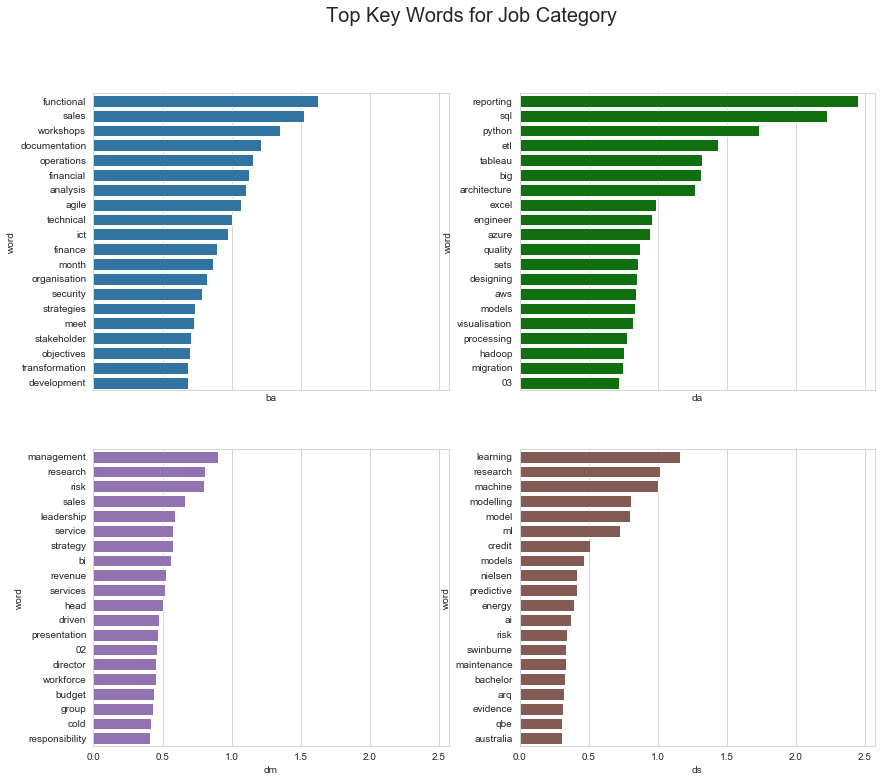

In [39]:
fig, ax = plt.subplots(2,2, figsize = (14,12), sharex= True)

sns.barplot(y='word', x='ba', data=coefs.sort_values('ba', ascending=False).head(20), ax=ax[0][0], color = 'C0')
sns.barplot(y='word', x='da', data=coefs.sort_values('da', ascending=False).head(20), ax=ax[0][1], color = 'g')
sns.barplot(y='word', x='dm', data=coefs.sort_values('dm', ascending=False).head(20), ax=ax[1][0], color = 'C4')
sns.barplot(y='word', x='ds', data=coefs.sort_values('ds', ascending=False).head(20), ax=ax[1][1], color = 'C5')
plt.suptitle('Top Key Words for Job Category', fontsize =20)
plt.show()

## Observations:

The top words and key findings for each job category are as follows:

1. A Business Analyst is expected to have basic technical skills, most of the skills we see in the chart are agile, functional, financial and planning.
2. The Data Analyst shows SQL, tableau, Azure, Hadoop, AWS so on and so forth as the top technical skills. As a Data Analyst, these are the basic skills expected in the market.
3. The Data Manager depicts more of managerial skills like strategy, responsibility, budgeting etc. which every manager is expected to have.
4. The keywords for Data Scientists do not exhibit a useful pattern due to lesser observations (only 38 observations) as well as vagueness in the job descriptions. Some of the relevant words which were picked up as top skills are AI, machine learning, modelling, predective etc.

## 2. SVM

In [20]:
# fit the training dataset on the classifier
SVM = svm.SVC(C = 0.2, kernel='linear', degree=3, gamma='auto', random_state= 42)
SVM.fit(X_train1,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test1)
# Use accuracy_score function to get the accuracy
#print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)
print('Overall Training Accuracy for SVM: {:.1f}%'.format(SVM.score(X_train1, y_train)* 100))
print('Overall Testing Accuracy for SVM: {:.1f}%'.format(SVM.score(X_test1, y_test) * 100))

Overall Training Accuracy for SVM: 82.9%
Overall Testing Accuracy for SVM: 71.2%


In [21]:
# SVM linear with cross validation
cv_train_score3 = np.mean(cross_val_score(SVM, X_train1, y_train, cv=3, n_jobs= 1))
cv_test_score3 = np.mean(cross_val_score(SVM, X_test1, y_test, cv=3, n_jobs= 1))
train_pred = SVM.predict(X_train1)
test_pred = SVM.predict(X_test1)
print('Overall Training Accuracy for SVM Linear: {:.1f}%'.format(cv_train_score3 * 100))
print('Overall Testing Accuracy for SVM Linear : {:.1f}%'.format(cv_test_score3 * 100))

Overall Training Accuracy for SVM Linear: 73.3%
Overall Testing Accuracy for SVM Linear : 50.8%


In [22]:
# fit the training dataset on the classifier
SVM2 = svm.SVC(C = 1.5, kernel='rbf', degree=2, gamma='auto', random_state= 42)
SVM2.fit(X_train1,y_train)
# predict the labels on validation dataset
predictions_SVM2 = SVM2.predict(X_test1)
# Use accuracy_score function to get the accuracy
print('Overall Training Accuracy for SVM with rbf: {:.1f}%'.format(SVM2.score(X_train1, y_train)* 100))
print('Overall Testing Accuracy for SVM with rbf: {:.1f}%'.format(SVM2.score(X_test1, y_test) * 100))

Overall Training Accuracy for SVM with rbf: 46.9%
Overall Testing Accuracy for SVM with rbf: 50.8%


In [23]:
## SVM rbf with cross validation
cv_train_score4 = np.mean(cross_val_score(SVM2, X_train1, y_train, cv=5, n_jobs=1))
cv_test_score4 = np.mean(cross_val_score(SVM2, X_test1, y_test, cv=5, n_jobs=1))
train_pred = SVM2.predict(X_train1)
test_pred = SVM2.predict(X_test1)
print('Overall Training Accuracy for SVM rbf: {:.1f}%'.format(cv_train_score4 * 100))
print('Overall Testing Accuracy for SVM rbf: {:.1f}%'.format(cv_test_score4 * 100))

Overall Training Accuracy for SVM rbf: 46.9%
Overall Testing Accuracy for SVM rbf: 50.8%


## 3. Naive Bayes

In [24]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB(alpha = 0.6)
Naive.fit(X_train1,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(X_test1)
# score function to get the overall score for training and testing to make sure the model is not overfit or underfit
print('Overall Training Accuracy for Naive Bayes: {:.1f}%'.format(Naive.score(X_train1, y_train)* 100))
print('Overall Testing Accuracy for Naive Bayes: {:.1f}%'.format(Naive.score(X_test1, y_test) * 100))

Overall Training Accuracy for Naive Bayes: 83.8%
Overall Testing Accuracy for Naive Bayes: 70.7%


In [25]:
## Naive Bayes with cross validation
cv_train_score2 = np.mean(cross_val_score(Naive, X_train1, y_train, cv=5, n_jobs= 1))
cv_test_score2 = np.mean(cross_val_score(Naive, X_test1, y_test, cv=5, n_jobs= 1))
train_pred = Naive.predict(X_train1)
test_pred = Naive.predict(X_test1)
print('Overall Training Accuracy for Naive Bayes: {:.1f}%'.format(cv_train_score2 * 100))
print('Overall Testing Accuracy for Naive Bayes: {:.1f}%'.format(cv_test_score2 * 100))

Overall Training Accuracy for Naive Bayes: 75.2%
Overall Testing Accuracy for Naive Bayes: 57.1%


# 4. Random Forest

In [26]:
## Random Forest without cross validation
clf = RandomForestClassifier(n_estimators= 10)
clf.fit(X_train1,y_train)
# predict the labels on validation dataset
predictions_clf = clf.predict(X_test1)
print('Overall Training Accuracy for Randorm Forest: {:.1f}%'.format(Naive.score(X_train1, y_train)* 100))
print('Overall Testing Accuracy for Random Forest: {:.1f}%'.format(Naive.score(X_test1, y_test) * 100))

Overall Training Accuracy for Randorm Forest: 83.8%
Overall Testing Accuracy for Random Forest: 70.7%


In [27]:
## Random Forest with cross validation
clf = RandomForestClassifier(n_estimators= 10)
clf.fit(X_train1,y_train)
cv_train_score = np.mean(cross_val_score(clf, X_train1, y_train, cv=5, n_jobs=1))
cv_test_score = np.mean(cross_val_score(clf, X_test1, y_test, cv=5, n_jobs=1))
print('Overall Training Accuracy for RandomForest: {:.1f}%'.format(cv_train_score * 100))
print('Overall Testing Accuracy for RandomForest: {:.1f}%'.format(cv_test_score * 100))

Overall Training Accuracy for RandomForest: 66.5%
Overall Testing Accuracy for RandomForest: 57.3%


# Observations:

I tried four different classification models for this problem:

1. Logistic Regression(l1, l2)
2. SVM (linear,rbf)
3. Naive Bayes
4. Random Forest

## Conclusion:

Logistic Regression with L1 penalty and SVM with rbf are the two models I would choose for now as they are giving me better score with less variance (6% variance). All the other models are overfitting with huge variance which I feel is not ideal for better prediction.

The analysis was based on very few observations and it can always be improvised with the larger data and I would look upon working on it further by scraping in future for better analysis and prediction.